# Machine Learning on the Titanic Dataset

This notebook focuses on one of [Kaggle's](https://www.kaggle.com/c/titanic) "Getting Started" prediction competitions, the Titanic challenge.

In [1]:
# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# modules to handle data
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# environment setup
sns.set()
plt.style.use('ggplot')
%matplotlib notebook

## I. Data Wrangling

Like in most cases with any data science project, we are likely to encounter dirty or missing data and will need to do some wrangling before we can really do anything else.

In [3]:
# load data
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# save PassengerId for final submission
passengerId = test.PassengerId

# merge train and test
df = train.append(test, ignore_index=True)

In [6]:
# create indexes to separate data later on
train_idx = len(train)
test_idx = len(df) - len(test)

In [7]:
# view head of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# PassengerId can be removed from data for now
df.drop('PassengerId', axis=1, inplace=True)

In [9]:
#EDA

In [10]:
df.dtypes

Survived    float64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [12]:
# target feature 'Survived' has missing coloumns as we have merged the train and test data together

In [13]:
df.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Cabin        186
Embarked       3
dtype: int64

In [14]:
# address the nan coloumns

<IPython.core.display.Javascript object>


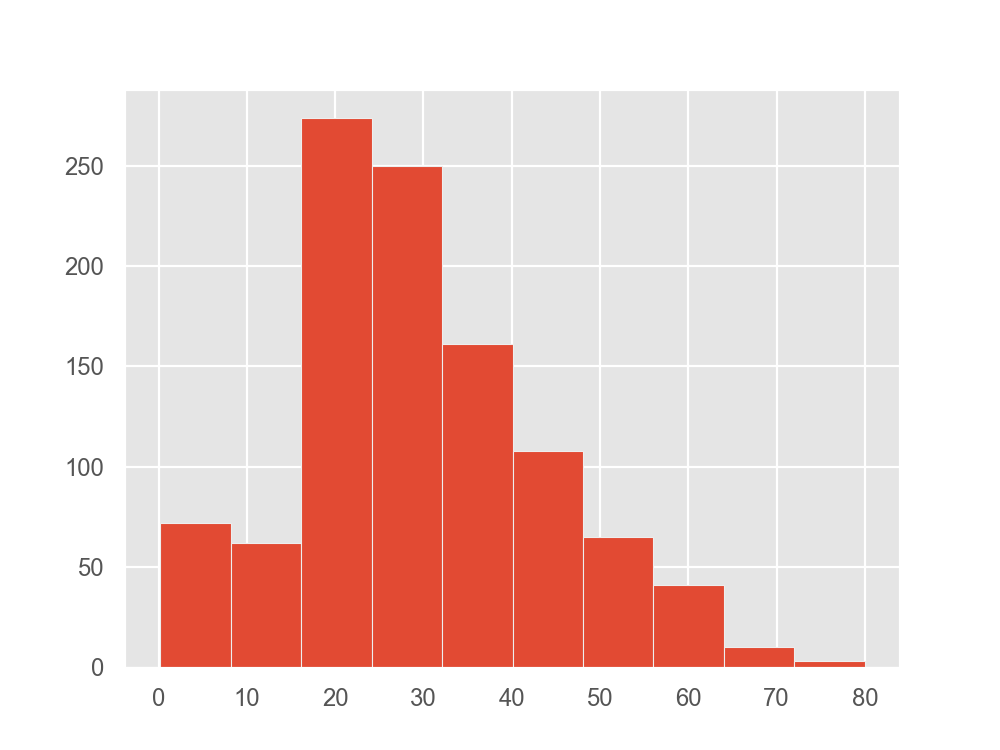

In [15]:
df['Age'].hist()

In [17]:
df['Age'].min()

0.17

In [18]:
df['Age'].max()

80.0

In [19]:
df['Age'].median()

28.0

In [20]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [21]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [22]:
#Embarked

In [23]:
df['Embarked'].mode()

0    S
dtype: object

In [24]:
df['Embarked'].fillna('S',inplace=True)

In [25]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

In [26]:
# check correlation 

In [29]:
# Cabin has many null and unique values so can drop along with the name and id

In [30]:
df.drop(columns=['Cabin','Name'],axis=1,inplace=True)

In [31]:
df.drop(columns=['Ticket'],axis=1,inplace=True)

KeyError: "['Ticket'] not found in axis"

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [33]:
# split categorical and numerical

In [34]:
df.dtypes

Survived    float64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [35]:
cat=df.select_dtypes(include=['object'])
num=df.select_dtypes(include=['int64','float64'])

In [36]:
dummies=pd.get_dummies(cat,drop_first=True)

In [37]:
data=pd.concat([num,dummies],axis=1)

In [38]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,1,0,1
1,1.0,1,38.0,1,0,71.2833,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1


In [40]:
train.shape

(891, 12)

In [41]:
# create train and test data
train = data[ :train_idx]
test = data[test_idx: ]

# convert Survived back to int
train.Survived = train.Survived.astype(int)

In [42]:
X=train.drop('Survived', axis=1).values
y=train.Survived.values

In [43]:
# create array for test set
X_test = test.drop('Survived', axis=1).values

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix

In [45]:
rf=RandomForestClassifier()

In [46]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
score=cross_val_score(rf,X,y,cv=12,scoring='accuracy')
score.mean()

0.8115465465465466

In [64]:
y=rf.predict(X_test)

In [57]:
s=pd.DataFrame(X_test)

In [60]:
s.fillna(0,inplace=True)

In [61]:
s.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [62]:
X_test=s.values

In [63]:
X_test

array([[ 3. , 34.5,  0. , ...,  1. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  1. ,  0. ,  1. ],
       [ 3. , 28. ,  0. , ...,  1. ,  0. ,  1. ],
       [ 3. , 28. ,  1. , ...,  1. ,  0. ,  0. ]])

In [ ]:
# create param grid object
rf_params = dict(
    max_depth = [n for n in range(9, 14)],
    min_samples_split = [n for n in range(4, 11)],
    min_samples_leaf = [n for n in range(2, 5)],
    n_estimators = [n for n in range(10, 60, 10)],
)

In [ ]:
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, cv=11)
rf_grid_search.fit(X, y)

In [ ]:
rf_grid_search.best_score_

In [ ]:
rf_grid_search.best_params_

In [ ]:
rf_pred=rf_grid_search.predict(X_test)

In [65]:
# dataframe with predictions
kaggle = pd.DataFrame( {'PassengerId': passengerId, 'Survived': y} )

In [66]:
kaggle

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [67]:
# save to csv
kaggle.to_csv('./Data/titanic_pred.csv', index=False)